<a href="https://colab.research.google.com/github/anchit2000/Food-Non-Food-Classification/blob/main/Food_nonfood_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello")

hello


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
cd Tatras\ projects

/content/drive/MyDrive/Tatras projects


In [ ]:
ls

'Food Nonfood data '/  'Jobs data'/  'News Evaluation'/   sample.csv


In [ ]:
cd Food\ Nonfood\ data\ 

/content/drive/MyDrive/Tatras projects/Food Nonfood data 


In [ ]:
cd training/

/content/drive/MyDrive/Tatras projects/Food Nonfood data /training


In [ ]:
# Reached till data

In [ ]:
# Loading Train and test images data

In [ ]:
import pandas as pd
import os
import glob
from tqdm import tqdm
df_training = pd.DataFrame(columns = ['Image','Food/Non-Food'])
print(df_training)
#appending names of these files in the csv file with lables food or nonfood 
training_direc = os.getcwd()
print(training_direc)

# for food directory
food_direc = training_direc+"/food/"
nonfood_direc = training_direc+"/non_food/"
print(food_direc)
print(nonfood_direc)

Empty DataFrame
Columns: [Image, Food/Non-Food]
Index: []
/content/drive/MyDrive/Tatras projects/Food Nonfood data /training
/content/drive/MyDrive/Tatras projects/Food Nonfood data /training/food/
/content/drive/MyDrive/Tatras projects/Food Nonfood data /training/non_food/


In [ ]:
list_food_items = [f for f in tqdm(glob.glob(food_direc+"*.jpg"))]
list_nonfood_items = [f for f in tqdm(glob.glob(nonfood_direc+"*.jpg"))]
print(len(list_food_items),len(list_nonfood_items))
df_training['Image'] = list_food_items + list_nonfood_items
for i in range(len(df_training['Image'])):
  if df_training['Image'][i] in list_food_items:
    df_training['Food/Non-Food'][i] = 1
  else:
    df_training['Food/Non-Food'][i] = 0
df_training
# 1 is for food images and 0 is for non-fod images

100%|██████████| 1500/1500 [00:00<00:00, 800032.55it/s]


1500 1500


,Image,Food/Non-Food
0,/content/drive/MyDrive/Tatras projects/Food No...,1
1,/content/drive/MyDrive/Tatras projects/Food No...,1
2,/content/drive/MyDrive/Tatras projects/Food No...,1
3,/content/drive/MyDrive/Tatras projects/Food No...,1
4,/content/drive/MyDrive/Tatras projects/Food No...,1
...,...,...
2995,/content/drive/MyDrive/Tatras projects/Food No...,0
2996,/content/drive/MyDrive/Tatras projects/Food No...,0
2997,/content/drive/MyDrive/Tatras projects/Food No...,0
2998,/content/drive/MyDrive/Tatras projects/Food No...,0


In [ ]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [ ]:
train_image = []
for i in tqdm(range(df_training.shape[0])):
    img = image.load_img(df_training['Image'][i], target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
X

  5%|▍         | 149/3000 [00:39<13:51,  3.43it/s]

KeyboardInterrupt: ignored

In [ ]:
X.shape

In [ ]:
y=df_training['Food/Non-Food'].values
y = np.asarray(y).astype('int')
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape

(2400, 224, 224, 3)

In [ ]:
y_train.shape

(2400,)

###Sequential Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
print(X.shape)
# X_train = X_train.reshape(X_train.shape[0],-1).T
# X_test = X_test.reshape(X_test.shape[0],-1).T
print(X_train,X_test)
X_train.shape

(3000, 224, 224, 3)
[[[[0.4509804  0.41960785 0.4117647 ]
   [0.45882353 0.42745098 0.41960785]
   [0.46666667 0.43529412 0.42745098]
   ...
   [0.47843137 0.49411765 0.4392157 ]
   [0.47843137 0.49411765 0.4392157 ]
   [0.47843137 0.49411765 0.43529412]]

  [[0.45490196 0.42352942 0.41568628]
   [0.45882353 0.42745098 0.41960785]
   [0.46666667 0.43529412 0.42745098]
   ...
   [0.48235294 0.49803922 0.44313726]
   [0.48235294 0.49803922 0.44313726]
   [0.47843137 0.49411765 0.43529412]]

  [[0.46666667 0.43529412 0.42745098]
   [0.46666667 0.43529412 0.42745098]
   [0.47058824 0.4392157  0.43137255]
   ...
   [0.4862745  0.5019608  0.44705883]
   [0.4862745  0.5019608  0.44705883]
   [0.4862745  0.5019608  0.44313726]]

  ...

  [[0.08627451 0.07843138 0.08235294]
   [0.09803922 0.08235294 0.08627451]
   [0.09411765 0.07843138 0.08235294]
   ...
   [0.01568628 0.03137255 0.03529412]
   [0.01176471 0.02745098 0.02352941]
   [0.01176471 0.03137255 0.01568628]]

  [[0.07843138 0.07058824

(2400, 224, 224, 3)

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
75/75 [==============================] - 542s 7s/step - loss: 0.0000e+00 - accuracy: 0.4704 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 2/10
75/75 [==============================] - 528s 7s/step - loss: 0.0000e+00 - accuracy: 0.5077 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 3/10
75/75 [==============================] - 519s 7s/step - loss: 0.0000e+00 - accuracy: 0.4818 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 4/10
75/75 [==============================] - 521s 7s/step - loss: 0.0000e+00 - accuracy: 0.4981 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 5/10
75/75 [==============================] - 521s 7s/step - loss: 0.0000e+00 - accuracy: 0.5163 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 6/10
75/75 [==============================] - 519s 7s/step - loss: 0.0000e+00 - accuracy: 0.4998 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 7/10
75/75 [==============================] - 521s 7s/step - loss: 0.0000e+00 - accuracy: 0.4943 - v

In [ ]:
# https://www.datasciencecentral.com/profiles/blogs/how-to-choose-a-machine-learning-model-some-guidelines. delete after reading 

In [ ]:
from keras.preprocessing.image import load_img , img_to_array
pic1 = load_img("/content/drive/MyDrive/Tatras projects/Food Nonfood data /training/non_food/10.jpg",target_size=(224,224,3), grayscale=False)
pic_array1 = img_to_array(pic1)
pic_array1 = pic_array1/255
# print(pic_array1)
# print(pic_array1.shape)
pic_array1 = (np.expand_dims(pic_array1,0))
# print(pic_array1.shape)
prediction1 = model.predict_classes(pic_array1)
print(prediction1)

pic = load_img("/content/drive/MyDrive/Tatras projects/Food Nonfood data /training/food/1.jpg",target_size=(224,224,3), grayscale=False)
pic_array = img_to_array(pic)
pic_array = pic_array/255
# pic_array
# print(pic_array.shape)
pic_array = (np.expand_dims(pic_array,0))
# print(pic_array.shape)
prediction = model.predict_classes(pic_array)
print(prediction)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1]]
[[1]]


### Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

In [ ]:
train_set_x = X_train.reshape(X_train.shape[0],-1).T
test_set_x = X_test.reshape(X_test.shape[0],-1).T
print(train_set_x.shape)
print(test_set_x.shape)
train_set_x

(150528, 2400)
(150528, 600)


array([[0.4509804 , 0.46666667, 0.0627451 , ..., 0.9882353 , 0.27450982,
        0.28627452],
       [0.41960785, 0.22352941, 0.0627451 , ..., 0.6745098 , 0.14901961,
        0.09803922],
       [0.4117647 , 0.03921569, 0.05490196, ..., 0.04313726, 0.09019608,
        0.08235294],
       ...,
       [0.03137255, 0.38039216, 0.5137255 , ..., 0.7882353 , 0.3882353 ,
        0.99215686],
       [0.02352941, 0.25882354, 0.5254902 , ..., 0.54901963, 0.38039216,
        0.98039216],
       [0.04313726, 0.2901961 , 0.56078434, ..., 0.22352941, 0.32941177,
        0.90588236]], dtype=float32)

In [ ]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [ ]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [ ]:

def propagate(w, b, X, Y):

    m = X.shape[1]

    A = sigmoid(np.dot(w.T,X)+b)                                    # compute activation
    cost = -1./m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                               # compute cost

    dw = 1/m*np.dot(X,(A-Y).T)
    db = 1/m*(np.sum(A-Y))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [ ]:

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations):
        
 
        grads, cost = propagate(w, b, X, Y)


        dw = grads["dw"]
        db = grads["db"]

        w = w-(learning_rate*dw)
        b = b-(learning_rate*db)

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [ ]:
# GRADED FUNCTION: predict

def predict(w, b, X):

    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T,X)+b)

    
    for i in range(A.shape[1]):

        if(A[0,i]<0.5):
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [ ]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

  
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

This cell below is to be ignored

In [ ]:
y_train
#of no use
y_train1 = []
for n, i in enumerate(y_train):
  if i == 1:
    y_train1.append('food')
  else:
    y_train1.append('nonfood')
print(y_train1)
y_test1 = []
for n, i in enumerate(y_test):
  if i == 1:
    y_test1.append('food')
  else:
    y_test1.append('nonfood')
print(y_test1)

['food', 'food', 'food', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'nonfood', 'food', 'food', 'nonfood', 'nonfood', 'food', 'food', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'food', 'nonfood', 'food', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'food', 'food', 'nonfood', 'food', 'food', 'nonfood', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'food', 'food', 'nonfood', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'nonfood', 'food', 'nonfood', 'food', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'food', 'food', 'nonfood', 'food', 'nonfood', 'nonfood', 'food', 'nonfood', 'nonfood', 'food', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'nonfood', 'food', 'food', 'nonfood', 'food'

In [ ]:
d = model(train_set_x, y_train, test_set_x, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
train accuracy: 88.5 %
test accuracy: 78.33333333333333 %


### more Neural Networks explored

In [ ]:
import tensorflow as tf

In [ ]:
for i in range(len(df_training['Image'])):
  if df_training['Food/Non-Food'][i] == 1:
    df_training['Food/Non-Food'][i] = 'Food'
  else:
    df_training['Food/Non-Food'][i] = 'Non-Food'
  # df_training['Image'][i] = df_training['Image'][i].split("/")[8]
df_training

,Image,Food/Non-Food
0,/content/drive/MyDrive/Tatras projects/Food No...,Food
1,/content/drive/MyDrive/Tatras projects/Food No...,Food
2,/content/drive/MyDrive/Tatras projects/Food No...,Food
3,/content/drive/MyDrive/Tatras projects/Food No...,Food
4,/content/drive/MyDrive/Tatras projects/Food No...,Food
...,...,...
2995,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
2996,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
2997,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
2998,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food


In [ ]:
df_training['Image'][0].split("/")[8]

'1287.jpg'

In [ ]:
import pandas as pd
import os
import glob
from tqdm import tqdm
df_validation = pd.DataFrame(columns = ['Image','Food/Non-Food'])
print(df_validation)
#appending names of these files in the csv file with lables food or nonfood 
validation_direc = '/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation'
print(validation_direc)

# for food directory
food_direcval = validation_direc+"/food/"
nonfood_direcval = validation_direc+"/non_food/"
print(food_direcval)
print(nonfood_direcval)

list_food_items = [f for f in tqdm(glob.glob(food_direcval+"*.jpg"))]
list_nonfood_items = [f for f in tqdm(glob.glob(nonfood_direcval+"*.jpg"))]
print(len(list_food_items),len(list_nonfood_items))
df_validation['Image'] = list_food_items + list_nonfood_items
for i in range(len(df_validation['Image'])):
  if df_validation['Image'][i] in list_food_items:
    df_validation['Food/Non-Food'][i] = 'Food'
  else:
    df_validation['Food/Non-Food'][i] = 'Non-Food'
df_validation
# 1 is for food images and 0 is for non-fod images

Empty DataFrame
Columns: [Image, Food/Non-Food]
Index: []
/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation
/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation/food/
/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation/non_food/


100%|██████████| 500/500 [00:00<00:00, 136631.18it/s]

500 500


,Image,Food/Non-Food
0,/content/drive/MyDrive/Tatras projects/Food No...,Food
1,/content/drive/MyDrive/Tatras projects/Food No...,Food
2,/content/drive/MyDrive/Tatras projects/Food No...,Food
3,/content/drive/MyDrive/Tatras projects/Food No...,Food
4,/content/drive/MyDrive/Tatras projects/Food No...,Food
...,...,...
995,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
996,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
997,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food
998,/content/drive/MyDrive/Tatras projects/Food No...,Non-Food


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Tatras projects/Food Nonfood data /training',
    class_mode='categorical',
    target_size=(224, 224),
    subset = 'training'
)
val_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
) 
val_generator = val_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation',
    class_mode='categorical',
    target_size=(224, 224),
    subset = 'training'
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
x, y = train_generator.next()
x.shape

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(32, 224, 224, 3)

In [ ]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
train_generator.num_classes

2

### Xception model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception

feature_extractor = Xception(weights='imagenet', 
                             input_shape=(224, 224, 3),
                             include_top=False)

# Either set last 1 or 2 layers to trainable or add 1 or 2 trainable Dense() layers at the end/top of architecture
feature_extractor.trainable = False

input_ = tf.keras.Input(shape=(224, 224, 3))

x = feature_extractor(input_, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dense(32, activation='relu')(x)
output_ = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(input_, output_)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# print
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                131136    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 20,994,729
Trainable params: 133,249
Non-trainable params: 20,861,480
_________________________________________

In [ ]:

model.fit(train_generator, epochs=20, validation_data=val_generator)


model.save('./cnn_food_model')'




83689472/83683744 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
94/94 [==============================] - 891s 9s/step - loss: 1.4097 - accuracy: 0.6253 - val_loss: 0.8808 - val_accuracy: 0.6860
Epoch 2/20
94/94 [==============================] - 769s 8s/step - loss: 0.8214 - accuracy: 0.7007 - val_loss: 0.7631 - val_accuracy: 0.7060
Epoch 3/20
94/94 [==============================] - 805s 9s/step - loss: 0.7496 - accuracy: 0.7230 - val_loss: 0.6910 - val_accuracy: 0.7530
Epoch 4/20
94/94 [==============================] - 795s 8s/step - loss: 0.6769 - accuracy: 0.7283 - val_loss: 0.6726 - val_accuracy: 0.7350
Epoch 5/20
94/94 [==============================] - 768s 8s/step - loss: 0.5976 - accuracy: 0.7620 - val_loss: 0.5841 - val_accuracy: 0.7690
Epoch 6/20
94/94 [==============================] - 766s 8s/step - loss: 0.6187 - accuracy: 0.7620 - val_loss: 0.6474 - val_accuracy: 0.7480
Epoch 7/20
94/94 [==============================] - 772s 8s/step - loss: 0.6122 - accuracy: 0.7530 - val_loss: 0.5842 - val_accuracy: 0.7690
Epoch 8/20
94

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./cnn_food_model/assets


In [ ]:

pic = load_img("/content/drive/MyDrive/Tatras projects/Food Nonfood data /training/food/1.jpg",target_size=(224,224,3), grayscale=False)
pic_array = img_to_array(pic)
pic_array = pic_array/255
# pic_array
# print(pic_array.shape)
pic_array = (np.expand_dims(pic_array,0))
# print(pic_array.shape)
prediction = model.predict(pic_array)
pred_class = decode_predictions(prediction, top=1)
print(pred_class)

In [ ]:
train_generator.class_indices

{'food': 0, 'non_food': 1}

### ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from keras.applications.imagenet_utils import decode_predictions
import tensorflow as tf
from tensorflow.keras.models import Model


base_model = ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
                            
# feature_extractor.trainable = False

# input_ = tf.keras.Input(shape=(224, 224, 3))

# x = feature_extractor(input_, training=True)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)

# output_ = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# model = tf.keras.Model(input_, output_)

# model.compile(optimizer='adam',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# model.fit(train_generator, epochs=1, validation_data=val_generator)  #change epochs to 20

# pic = load_img("/content/drive/MyDrive/Tatras projects/Food Nonfood data /training/food/1.jpg",target_size=(224,224,3), grayscale=False)
# pic_array = img_to_array(pic)
# pic_array = pic_array/255
# # pic_array
# # print(pic_array.shape)
# pic_array = (np.expand_dims(pic_array,0))
# # print(pic_array.shape)
# prediction = model.predict(pic_array)
# pred_class = decode_predictions(prediction, top=1)
# print(pred_class)

# model.save('/content/drive/MyDrive/Tatras projects/Food Nonfood data ')
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")
 
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes,activation= 'softmax')(x)
model = Model( base_model.input, outputs=predictions)
for layer in base_model.layers:
  layer.trainable = False
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
# model.fit(train_generator,epochs = 1)
# model.summary()


In [ ]:
model.fit(train_generator,epochs = 1)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


94/94 [==============================] - 494s 5s/step - loss: 0.2297 - accuracy: 0.9673


### Testing for a single image

In [ ]:
from keras.preprocessing.image import load_img , img_to_array
pic = load_img("/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation/food/121.jpg",target_size=(224,224,3), grayscale=False)
pic1 = load_img("/content/drive/MyDrive/Tatras projects/Food Nonfood data /validation/non_food/132.jpg",target_size=(224,224,3), grayscale=False)

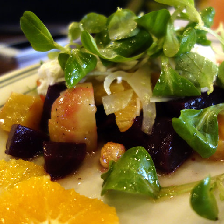

In [ ]:
pic

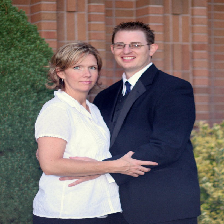

In [ ]:
pic1

In [ ]:
pic.getpixel

<bound method Image.getpixel of <PIL.Image.Image image mode=RGB size=224x224 at 0x7F4C49E0E250>>

In [ ]:
pic1.getpixel

<bound method Image.getpixel of <PIL.Image.Image image mode=RGB size=224x224 at 0x7F4C4D776C10>>

In [ ]:
pic_array = img_to_array(pic)

In [ ]:
pic_array1 = img_to_array(pic1)

In [ ]:
pic_array

array([[[  6.,   7.,  12.],
        [  6.,   7.,  12.],
        [  6.,   7.,  12.],
        ...,
        [211., 124.,  44.],
        [213., 125.,  38.],
        [214., 125.,  41.]],

       [[  6.,   7.,  12.],
        [  6.,   7.,  12.],
        [  6.,   7.,  12.],
        ...,
        [212., 123.,  43.],
        [211., 122.,  40.],
        [212., 121.,  38.]],

       [[  6.,   7.,  12.],
        [  6.,   7.,  12.],
        [  6.,   7.,  12.],
        ...,
        [210., 121.,  41.],
        [211., 120.,  41.],
        [211., 120.,  37.]],

       ...,

       [[228., 142.,   0.],
        [233., 151.,   5.],
        [245., 187.,  53.],
        ...,
        [172., 156.,  96.],
        [178., 162., 103.],
        [183., 168., 103.]],

       [[226., 146.,   5.],
        [229., 148.,   7.],
        [233., 167.,  11.],
        ...,
        [177., 160., 104.],
        [181., 164., 108.],
        [186., 170., 110.]],

       [[224., 142.,   0.],
        [231., 147.,   0.],
        [225., 1

In [ ]:
pic_array1

array([[[ 44.,  60.,  24.],
        [ 41.,  52.,  22.],
        [ 40.,  53.,  23.],
        ...,
        [114.,  67.,  51.],
        [114.,  65.,  48.],
        [119.,  68.,  49.]],

       [[ 66.,  89.,  43.],
        [ 53.,  57.,  22.],
        [ 58.,  61.,  30.],
        ...,
        [117.,  69.,  49.],
        [115.,  67.,  45.],
        [119.,  68.,  51.]],

       [[ 54.,  70.,  31.],
        [ 55.,  67.,  27.],
        [ 65.,  80.,  41.],
        ...,
        [111.,  75.,  59.],
        [110.,  73.,  55.],
        [110.,  72.,  53.]],

       ...,

       [[ 58.,  64.,  64.],
        [ 57.,  62.,  65.],
        [ 60.,  69.,  68.],
        ...,
        [188., 167., 112.],
        [179., 160., 101.],
        [156., 140.,  80.]],

       [[ 51.,  55.,  56.],
        [ 50.,  55.,  59.],
        [ 48.,  56.,  58.],
        ...,
        [183., 163., 104.],
        [176., 155.,  90.],
        [141., 138.,  87.]],

       [[ 57.,  58.,  62.],
        [ 39.,  42.,  47.],
        [ 47.,  

In [ ]:
# pic_array = pic_array/255.
pic_array

array([[[  6.,   7.,  12.],
        [  6.,   7.,  12.],
        [  6.,   7.,  12.],
        ...,
        [211., 124.,  44.],
        [213., 125.,  38.],
        [214., 125.,  41.]],

       [[  6.,   7.,  12.],
        [  6.,   7.,  12.],
        [  6.,   7.,  12.],
        ...,
        [212., 123.,  43.],
        [211., 122.,  40.],
        [212., 121.,  38.]],

       [[  6.,   7.,  12.],
        [  6.,   7.,  12.],
        [  6.,   7.,  12.],
        ...,
        [210., 121.,  41.],
        [211., 120.,  41.],
        [211., 120.,  37.]],

       ...,

       [[228., 142.,   0.],
        [233., 151.,   5.],
        [245., 187.,  53.],
        ...,
        [172., 156.,  96.],
        [178., 162., 103.],
        [183., 168., 103.]],

       [[226., 146.,   5.],
        [229., 148.,   7.],
        [233., 167.,  11.],
        ...,
        [177., 160., 104.],
        [181., 164., 108.],
        [186., 170., 110.]],

       [[224., 142.,   0.],
        [231., 147.,   0.],
        [225., 1

In [ ]:
# pic_array1 = pic_array1/255.
pic_array1

array([[[ 44.,  60.,  24.],
        [ 41.,  52.,  22.],
        [ 40.,  53.,  23.],
        ...,
        [114.,  67.,  51.],
        [114.,  65.,  48.],
        [119.,  68.,  49.]],

       [[ 66.,  89.,  43.],
        [ 53.,  57.,  22.],
        [ 58.,  61.,  30.],
        ...,
        [117.,  69.,  49.],
        [115.,  67.,  45.],
        [119.,  68.,  51.]],

       [[ 54.,  70.,  31.],
        [ 55.,  67.,  27.],
        [ 65.,  80.,  41.],
        ...,
        [111.,  75.,  59.],
        [110.,  73.,  55.],
        [110.,  72.,  53.]],

       ...,

       [[ 58.,  64.,  64.],
        [ 57.,  62.,  65.],
        [ 60.,  69.,  68.],
        ...,
        [188., 167., 112.],
        [179., 160., 101.],
        [156., 140.,  80.]],

       [[ 51.,  55.,  56.],
        [ 50.,  55.,  59.],
        [ 48.,  56.,  58.],
        ...,
        [183., 163., 104.],
        [176., 155.,  90.],
        [141., 138.,  87.]],

       [[ 57.,  58.,  62.],
        [ 39.,  42.,  47.],
        [ 47.,  

In [ ]:
import numpy as np
print(pic_array.shape)
pic_array = (np.expand_dims(pic_array,0))
print(pic_array.shape)
pic_array = preprocess_input(pic_array) 

(224, 224, 3)
(1, 224, 224, 3)


In [ ]:
print(pic_array1.shape)
pic_array1 = (np.expand_dims(pic_array1,0))
print(pic_array1.shape)
pic_array1 = preprocess_input(pic_array1)

(224, 224, 3)
(1, 224, 224, 3)


In [ ]:
prediction = model.predict(pic_array)

In [ ]:
prediction

array([[1.000000e+00, 7.286352e-13]], dtype=float32)

In [ ]:
from keras.applications.imagenet_utils import decode_predictions

In [ ]:
prediction1 = model.predict(pic_array1)

In [ ]:
prediction1

array([[1.4952793e-08, 1.0000000e+00]], dtype=float32)

In [ ]:
np.argmax(prediction)

0

In [ ]:
np.argmax(prediction1)

1

In [ ]:
train_generator.class_indices

{'food': 0, 'non_food': 1}

### Testing --> Ignore

In [ ]:
import numpy as np
from keras.preprocessing.image import image
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

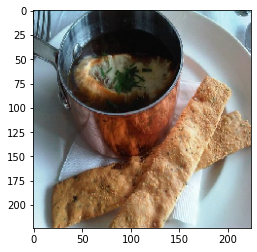

In [ ]:
img = image.load_img('/content/drive/MyDrive/Tatras projects/Food Nonfood data /training/food/0.jpg', target_size = (224, 224))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
model = ResNet50(weights='imagenet')
preds = model.predict(img)
print('Predicted:', decode_predictions(preds, top=1)[0])


49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n04263257', 'soup_bowl', 0.5050246)]


In [ ]:
testloss , accuracy = model.evaluate(val_generator,verbose = 2)


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


32/32 - 186s - loss: 0.1057 - accuracy: 0.9750


In [ ]:
print(accuracy)

0.9750000238418579
